In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import re
import pandas as pd
import numpy as np

In [2]:
gs_info = json.load(open("../data/results.dict.json"))

In [3]:
gs_info

{'n_rows:10_n_files:100': 0.5094641527749696,
 'n_rows:10_n_files:300': 0.7152784484314227,
 'n_rows:10_n_files:500': 0.7189366623522648,
 'n_rows:10_n_files:700': 0.7269010459204918,
 'n_rows:10_n_files:1000': 0.765378015000862,
 'n_rows:10_n_files:1500': 0.7432043437284622,
 'n_rows:10_n_files:2000': 0.7092768243607083,
 'n_rows:10_n_files:2500': 0.7092768243607083,
 'n_rows:20_n_files:100': 0.5462280418629273,
 'n_rows:20_n_files:300': 0.6716479797575735,
 'n_rows:20_n_files:500': 0.7418913636466117,
 'n_rows:20_n_files:700': 0.7311933278490018,
 'n_rows:20_n_files:1000': 0.7603779637735948,
 'n_rows:20_n_files:1500': 0.7417426710100627,
 'n_rows:20_n_files:2000': 0.7583648770226337,
 'n_rows:20_n_files:2500': 0.7583648770226337,
 'n_rows:50_n_files:100': 0.5059762195037587,
 'n_rows:50_n_files:300': 0.697206342940851,
 'n_rows:50_n_files:500': 0.7311175907967669,
 'n_rows:50_n_files:700': 0.7224036313239769,
 'n_rows:50_n_files:1000': 0.728471735742379,
 'n_rows:50_n_files:1500': 0

In [4]:
gs_info
df_dict_gs = {"Number of rows":[], "Number of files":[], "F1_macro":[]}



In [5]:
re.findall(r"n_rows:(\d+)", 'n_rows:20_n_files:1500')

['20']

In [6]:
for params, result in gs_info.items():
    n_rows = int(re.findall(r"n_rows:(\d+)", params)[0])
    n_files = int(re.findall(r"n_files:(\d+)", params)[0])
    df_dict_gs["Number of rows"].append(n_rows)
    df_dict_gs["Number of files"].append(n_files)
    df_dict_gs["F1_macro"].append(result)
    

In [7]:
df_gs = pd.DataFrame(df_dict_gs)

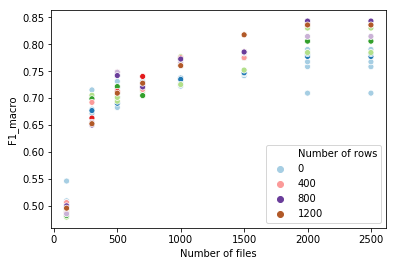

In [8]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax2 = sns.scatterplot(x="Number of files", y="F1_macro", data=df_gs, hue="Number of rows", palette="Paired")

In [ ]:
## Ablation bar graph

In [10]:
abl = json.load(open("../data/ablation_results.json"))


In [12]:
df_dict_abl = {"features_used":[], "F1_macro":[]}

In [13]:
for k,v in list(abl.items())[:-1]:
    df_dict_abl["features_used"].append(k)
    df_dict_abl["F1_macro"].append(v["f_score"])

In [15]:
df_abl = pd.DataFrame(df_dict_abl)
df_abl

,features_used,F1_macro
0,custom_features,0.187226
1,cell_features,0.758357
2,header_features,0.631361
3,custom_cell,0.678490
4,custom_header,0.589235
5,cell_header,0.874259
6,custom_cell_header,0.840462


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

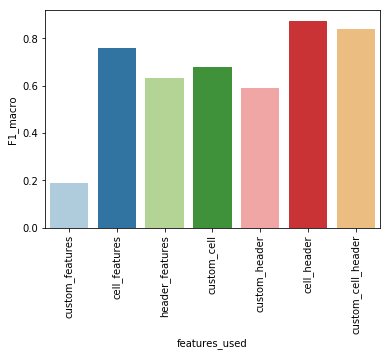

In [16]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.barplot(x="features_used", y="F1_macro", data=df_abl, palette="Paired")

plt.xticks(rotation=90)